In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("save_all.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.index = range(1, len(df) + 1)
df.describe()

,machine1_idle,machine2_idle,machine3_idle,machine4_idle,waitting1,waitting2,waitting3,waitting4,finish_number
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,2.189484e+06,1.057485e+06,2.757305e+06,1.628278e+06,1.646656e+06,4.476450e+06,4.320284e+05,2.891820e+06,4715.828500
std,1.705824e+06,1.412680e+06,1.745429e+06,1.594699e+06,3.666151e+06,5.159362e+06,1.682009e+06,4.564143e+06,2776.431691
min,0.000000e+00,2.000000e+02,6.730000e+02,6.860000e+02,4.552000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1247.000000
25%,6.003802e+05,9.097500e+02,1.212023e+06,2.277625e+04,6.843750e+03,7.228250e+03,0.000000e+00,3.875000e+01,2515.000000
50%,2.111452e+06,2.017220e+05,2.724476e+06,1.248680e+06,1.665700e+04,1.243790e+06,0.000000e+00,5.837250e+04,4754.500000
75%,3.624228e+06,1.820213e+06,4.234129e+06,2.771004e+06,2.547820e+05,9.815336e+06,3.194250e+03,4.897017e+06,6573.500000
max,5.741665e+06,5.268509e+06,5.901794e+06,5.632274e+06,1.215597e+07,1.363196e+07,9.221945e+06,1.316268e+07,11935.000000


In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


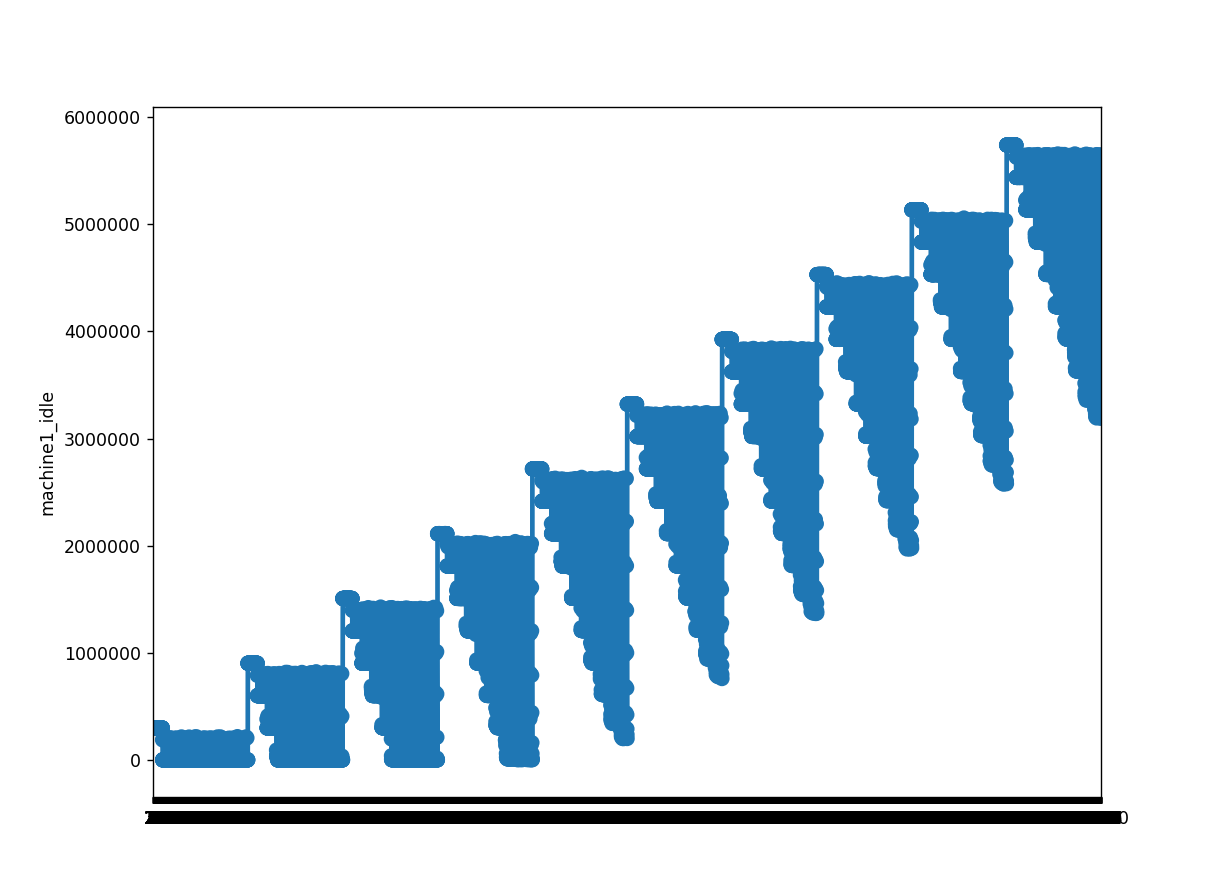

In [4]:
sns.pointplot(x=df.index.to_list(),y="machine1_idle",data=df)
#sns.pointplot(x=df.index.to_list(),y="machine2_idle",data=df)
#sns.pointplot(x=df.index.to_list(),y="machine3_idle",data=df)
#sns.pointplot(x=df.index.to_list(),y="machine4_idle",data=df)
plt.show()


In [8]:
df["idle_sum"] = df["machine1_idle"]+df["machine2_idle"]+df["machine3_idle"]+df["machine4_idle"]
df["cost_sum"] = 100*df["waitting1"]+200*df["waitting2"]+300*df["waitting3"]+400*df["waitting4"]

In [13]:
from ast import literal_eval
df["machine_num_sum"] = [sum(literal_eval(x)) for x in df['machine_number']]
df.head()

,machine_number,machine1_idle,machine2_idle,machine3_idle,machine4_idle,waitting1,waitting2,waitting3,waitting4,finish_number,idle_sum,cost_sum,machine_num_sum
1,"(1, 1, 1, 1)",296769,231,448169,145951,230419,12800326,2533,558663,1258,891120,2807332200,4
2,"(1, 1, 1, 2)",297811,239,453505,743849,174121,13398677,3990,14636,1256,1495404,2704198900,5
3,"(1, 1, 1, 3)",296892,248,445794,1364926,168013,13427882,2840,344,1259,2107860,2703367300,6
4,"(1, 1, 1, 4)",296830,237,460527,1972247,165786,13449134,1339,0,1257,2729841,2706807100,7
5,"(1, 1, 1, 5)",296757,232,453921,2553406,171729,13411349,2855,0,1259,3304316,2700299200,8


In [14]:
df["idle_percentage"] = df["idle_sum"]/df["machine_num_sum"]/(24*60*7*60)

<IPython.core.display.Javascript object>


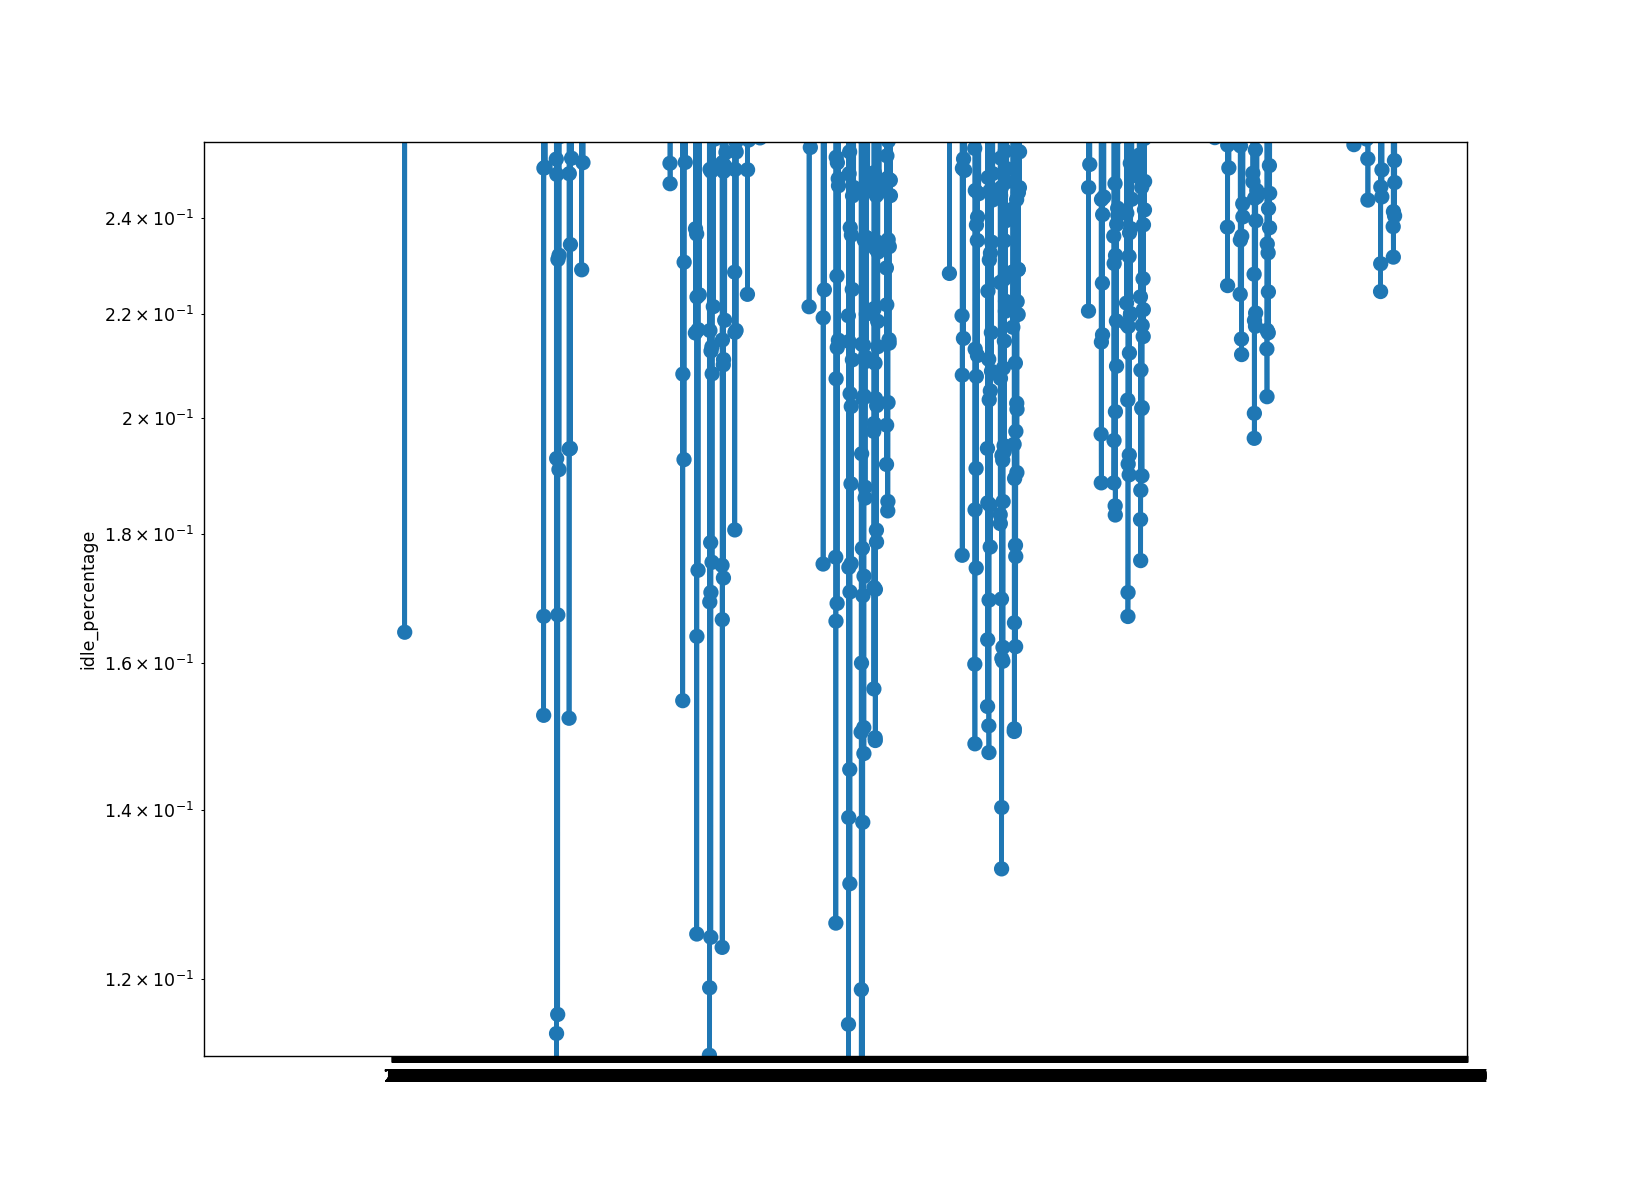

In [16]:
sns.pointplot(x=df.index.to_list(),y="idle_percentage",data=df)


In [17]:
df_reduce = df[df["idle_percentage"] < 0.5]
df_reduce.shape

(3397, 14)

<IPython.core.display.Javascript object>


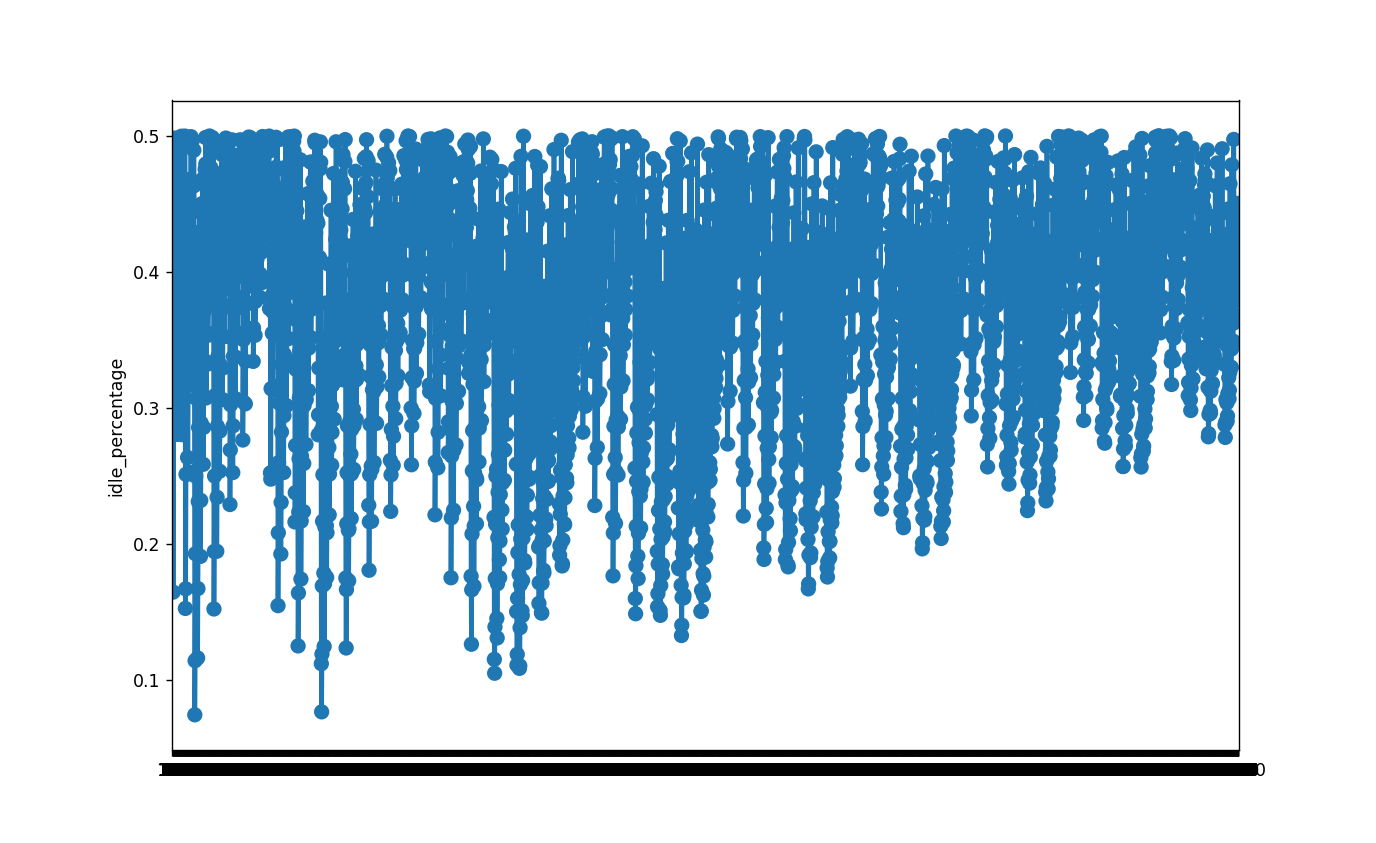

In [18]:
sns.pointplot(x=df_reduce.index.to_list(),y="idle_percentage",data=df_reduce)

In [19]:
df_reduce = df[df["idle_percentage"] < 0.3]
df_reduce.shape

(727, 14)

<IPython.core.display.Javascript object>


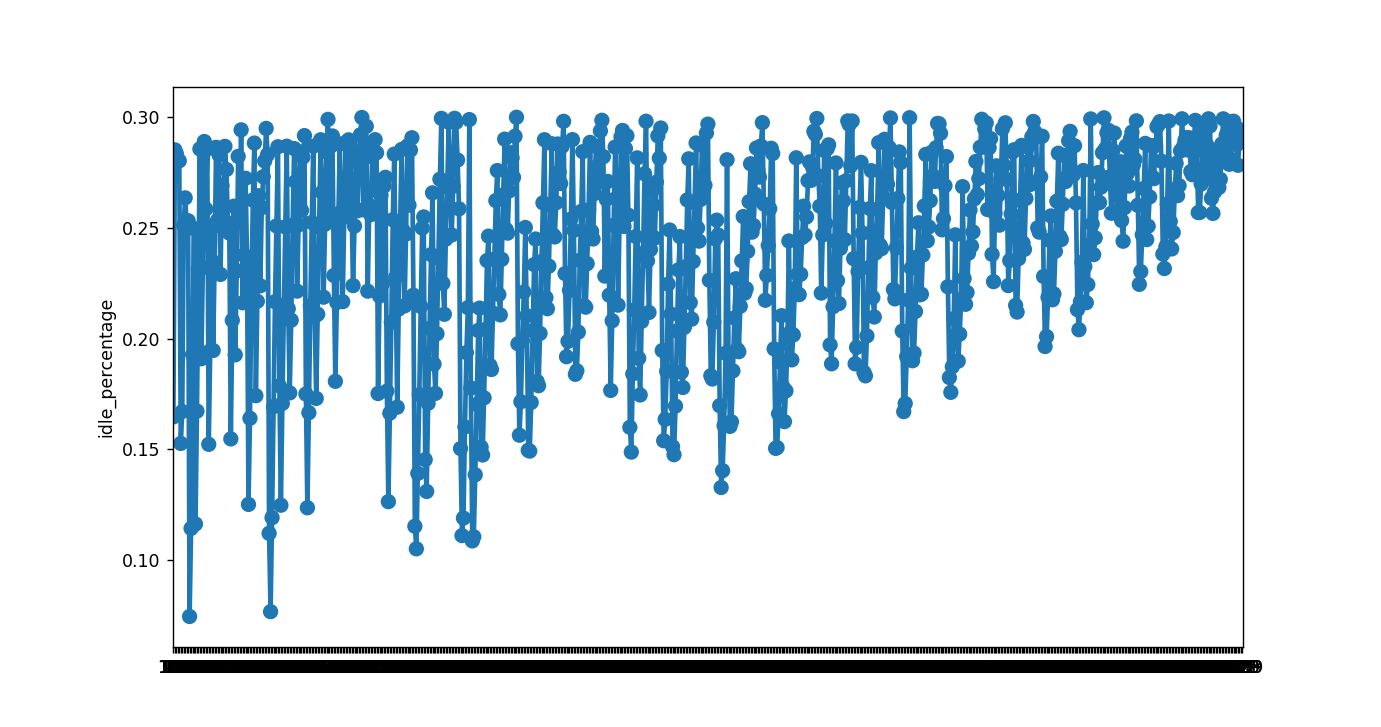

In [20]:
sns.pointplot(x=df_reduce.index.to_list(),y="idle_percentage",data=df_reduce)

In [21]:
df.loc[df['idle_percentage'].idxmin()]

machine_number     (2, 4, 1, 3)
machine1_idle             91133
machine2_idle            182001
machine3_idle             39479
machine4_idle            137275
waitting1               2480621
waitting2                174754
waitting3               3269152
waitting4               3597376
finish_number              4641
idle_sum                 449888
cost_sum             2702708900
machine_num_sum              10
idle_percentage       0.0743862
Name: 1303, dtype: object

In [24]:
df[df['machine_number']=="(4, 8, 2, 6)"]

,machine_number,machine1_idle,machine2_idle,machine3_idle,machine4_idle,waitting1,waitting2,waitting3,waitting4,finish_number,idle_sum,cost_sum,machine_num_sum,idle_percentage
3716,"(4, 8, 2, 6)",262440,527381,128476,423766,1131578,78730,1725180,1430580,8970,1342063,1218689800,20,0.110951


<IPython.core.display.Javascript object>


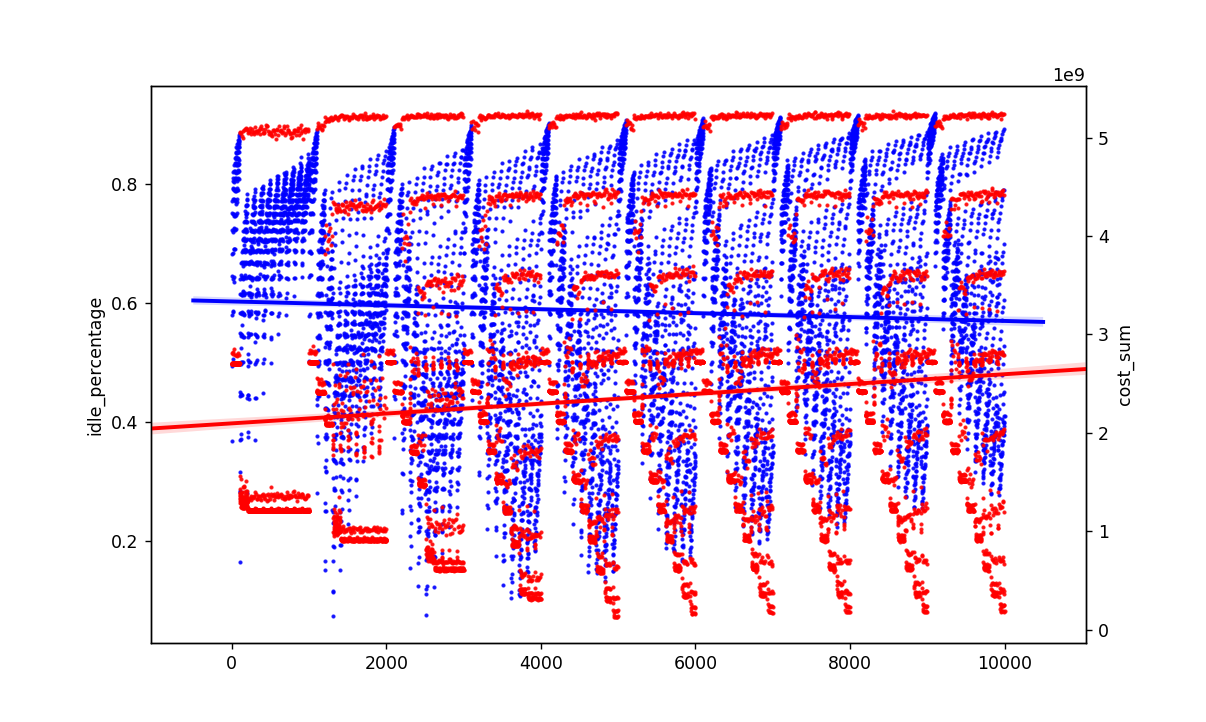

In [40]:
sns.regplot(x=df.index.to_list(),y=df["idle_percentage"],color = 'b',scatter_kws={'s':2})
sns.regplot(x=df.index.to_list(),y=df["cost_sum"],color='r',ax=plt.twinx(),scatter_kws={'s':2})

<IPython.core.display.Javascript object>


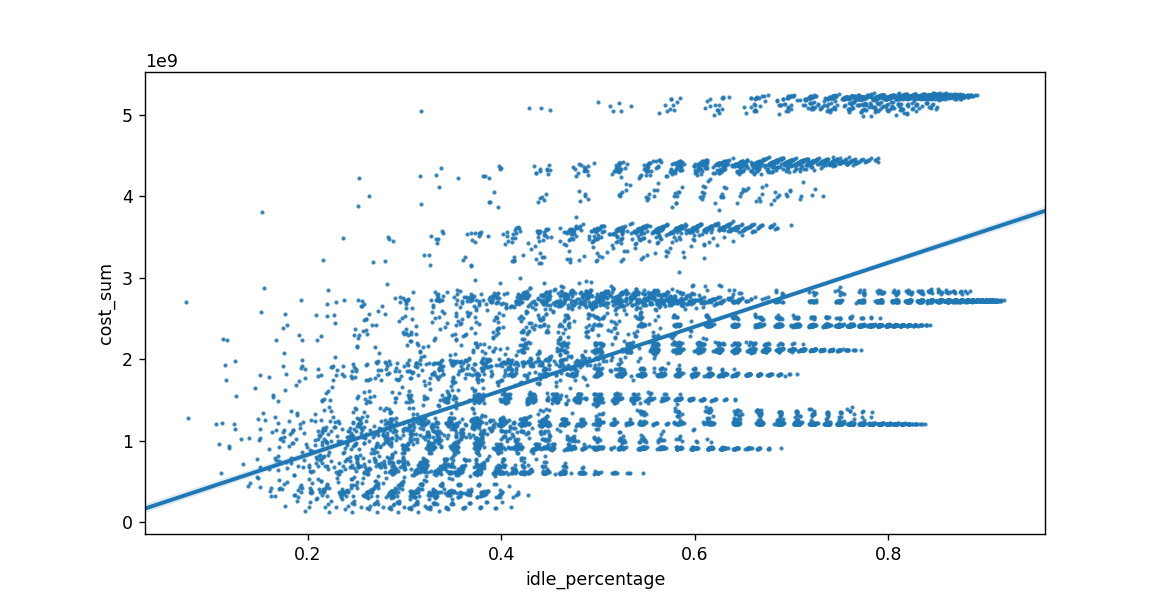

In [42]:
sns.regplot(x=df["idle_percentage"],y=df["cost_sum"],scatter_kws={'s':2})